In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict,StratifiedShuffleSplit,cross_validate,cross_validate,ShuffleSplit

In [4]:
df_train = pd.read_csv("../data_train_125ft.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,0.0,87.0,1.0,14.0,712.000000,696.0,65.440519,240.0,0.703359,-0.246387,...,712.000000,696.0,65.707979,240.0,0.699256,-0.277091,783.821985,0.785714,9.0,6.0
1,2.0,49.0,1.0,13.0,712.000000,691.0,47.300458,158.0,0.884010,-0.332635,...,712.000000,691.0,47.483330,156.0,0.894198,-0.355280,380.188159,1.000000,13.0,12.0
2,1.0,86.0,1.0,9.0,1096.250000,1098.0,8.150920,28.0,-0.156675,-0.642487,...,1096.000000,1098.0,8.426150,28.0,-0.160466,-0.801230,808.359965,1.000000,8.0,6.0
3,1.0,70.0,1.0,8.0,1169.714286,1168.0,4.463000,14.0,0.642283,-0.722722,...,1169.428571,1168.0,4.237828,14.0,0.827427,-0.140248,1150.133430,1.000000,8.0,7.0
4,3.0,61.0,0.0,16.0,585.333333,586.0,2.890598,12.0,0.196283,0.113400,...,585.333333,586.0,3.155243,12.0,0.354663,-0.484056,198.042444,1.000000,16.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8343,0.0,72.0,1.0,16.0,619.466667,592.0,139.659522,480.0,0.480046,-0.842798,...,619.466667,594.0,139.562109,482.0,0.472791,-0.825913,468.155165,1.000000,16.0,8.0
8344,3.0,23.0,0.0,19.0,510.777778,512.0,7.091118,30.0,-0.059891,-0.269851,...,510.888889,512.0,6.870944,28.0,0.081059,-0.433829,309.210006,1.000000,19.0,18.0
8345,1.0,51.0,0.0,9.0,1090.250000,1088.0,9.769212,30.0,0.213875,-1.152589,...,1090.250000,1088.0,8.742854,28.0,0.436427,-0.891096,940.155678,1.000000,9.0,8.0
8346,3.0,45.0,0.0,26.0,370.320000,370.0,3.133305,10.0,0.358316,-0.885061,...,370.400000,370.0,3.098387,12.0,0.051640,-0.703333,856.813033,0.461538,1.0,6.0


In [29]:
x_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values
# x_train = x_train[fti_index]

In [30]:
len(x_train)

8348

In [10]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)

In [11]:
df_test = pd.read_csv("../data_test_125ft.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,1.0,32.0,0.0,9.0,1091.750000,1091.0,22.280877,66.0,0.493022,-0.931472,...,1092.000000,1091.0,22.000000,66.0,0.521225,-0.913087,373.995302,1.0,9.0,7.0
1,1.0,17.0,0.0,9.0,1115.000000,1106.0,59.841457,186.0,0.777480,-0.423745,...,1115.000000,1107.0,60.728906,192.0,0.772436,-0.395166,477.271172,1.0,9.0,8.0
2,2.0,64.0,0.0,12.0,806.000000,804.0,8.045326,30.0,0.293282,-0.392690,...,806.000000,804.0,7.722458,26.0,0.198976,-0.896193,277.972651,1.0,12.0,11.0
3,3.0,61.0,0.0,21.0,458.300000,458.0,1.705872,6.0,0.192180,-0.770964,...,458.300000,458.0,1.926136,6.0,0.368600,-0.876527,361.998395,1.0,0.0,20.0
4,1.0,70.0,1.0,10.0,941.555556,1054.0,220.140920,628.0,-1.482314,0.419095,...,1059.250000,1059.0,10.341059,34.0,-0.061463,-0.843856,586.261896,1.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,3.0,71.0,0.0,20.0,485.789474,486.0,3.104817,10.0,-0.415255,-0.874744,...,485.789474,486.0,2.966106,10.0,-0.496663,-0.494835,798.662084,1.0,10.0,19.0
2084,1.0,51.0,1.0,9.0,1060.250000,1056.0,14.677789,44.0,0.273677,-1.204916,...,1060.250000,1056.0,13.872184,40.0,0.231747,-1.352375,603.272611,1.0,9.0,8.0
2085,1.0,61.0,1.0,9.0,1070.250000,1076.0,33.082284,98.0,-0.016678,-1.320021,...,1070.250000,1075.0,32.686962,96.0,0.030170,-1.329810,692.057509,1.0,9.0,4.0
2086,1.0,74.0,1.0,9.0,1021.750000,1018.0,7.171994,22.0,0.898849,-0.581729,...,1021.750000,1020.0,7.101936,24.0,0.839867,-0.281413,456.052143,1.0,9.0,8.0


In [12]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values
x_test = x_test[fti_index]

In [13]:
x_test = scale.transform(x_test)

In [14]:
# Create based model
level0 = list()
level0.append(('RF', RandomForestClassifier(criterion='log_loss', max_depth=5, max_features='sqrt', n_estimators=50)))
level0.append(('AB', AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.01, n_estimators=1000)))
level0.append(('CB', CatBoostClassifier(iterations= 300, learning_rate=0.1)))
level0.append(('GB', GradientBoostingClassifier(criterion= 'squared_error',learning_rate= 0.1,loss= 'log_loss',n_estimators= 200)))
level0.append(('XGB', XGBClassifier(gamma=0, learning_rate = 0.1, max_depth= 3, min_child_weight= 1, n_estimators= 1000)))
level0.append(('LGB', LGBMClassifier(boosting= 'gbdt', data_sample_strategy= 'goss', estimators= 50, learning_rate=0.1, objective= 'multiclass')))


level1 = list()
level1.append(('LR', LogisticRegression(C= 10, max_iter= 200, penalty= 'l2', solver= 'saga')))
level1.append(('SVM', SVC(C= 10, gamma= 'scale', kernel= 'rbf', probability= True)))
level1.append(('DT', DecisionTreeClassifier(criterion= 'gini',max_depth= 5,max_features= 'sqrt',splitter= 'best')))
level1.append(('KNN', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 6, p= 1, weights= 'distance')))


In [15]:
from sklearn.model_selection import KFold,StratifiedKFold,StratifiedShuffleSplit,StratifiedGroupKFold
import warnings
warnings.filterwarnings('ignore')

kf = StratifiedKFold(n_splits=5,random_state=None)

train_news = np.empty((x_train.shape[0], 0))
test_news = np.empty((x_test.shape[0], 0))

for name, model in level0:
    print(f"Model: {name}")
    print("----------------")
    train_model = []
    for i,(train_index, test_index) in enumerate(kf.split(x_train, y_train)):
        print(f"Fold {i}")
        print(f"train: {len(train_index)}")
        print(f"test: {len(test_index)}")
        # Train model in 4/5
        model.fit(x_train[train_index], y_train[train_index])
        # predict model in 1/5
        y_pred = model.predict(x_train[test_index])
        train_model.extend(y_pred)
    # Predict on test set
    model.fit(x_train, y_train)
    test_model = model.predict(x_test)
    # Add column to news data
    train_news = np.column_stack((train_news, np.array(train_model).reshape(-1, 1)))
    test_news = np.column_stack((test_news, np.array(test_model).reshape(-1, 1)))
    print("-------Done-------")


Model: RF
----------------


ValueError: Found input variables with inconsistent numbers of samples: [50, 8348]

In [49]:
warnings.filterwarnings('ignore')

train_news_final = np.empty((train_news.shape[0], 0))
test_news_final = np.empty((test_news.shape[0], 0))

for name, model in level1:
    print(f"Model: {name}")
    print("----------------")
    train_model = []
    for i,(train_index, test_index) in enumerate(kf.split(train_news, y_train)):
        print(f"Fold {i}")
        # Train model in 4/5
        model.fit(train_news[train_index], y_train[train_index])
        # predict model in 1/5
        y_pred = model.predict(train_news[test_index])
        train_model.extend(y_pred)
    # Predict on test set
    model.fit(train_news, y_train)
    test_model = model.predict(test_news)
    # Add column to news data
    train_news_final = np.column_stack((train_news_final, np.array(train_model).reshape(-1, 1)))
    test_news_final = np.column_stack((test_news_final, np.array(test_model).reshape(-1, 1)))
    print("-------Done-------")

Model: LR
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
-------Done-------
Model: SVM
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
-------Done-------
Model: DT
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
-------Done-------
Model: KNN
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
-------Done-------


In [50]:
# train_news_final = pd.read_csv("../train_news_final.csv")
# train_news_final.drop(columns=['Unnamed: 0'],inplace=True)
# test_news_final = pd.read_csv("../test_news_final.csv")
# test_news_final.drop(columns=['Unnamed: 0'],inplace=True)
# train_news_final = train_news_final.to_numpy()
# test_news_final = test_news_final.to_numpy()

In [51]:
from sklearn.model_selection import GridSearchCV
meta_model = AdaBoostClassifier()
params = {
    'n_estimators': [10,50,100,1000],
    'learning_rate': [0.01,0.1,1,10],
    'algorithm': ['SAMME', 'SAMME.R'],
}
GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=5, verbose=5)
GS.fit(train_news_final, y_train)
GS.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.578 total time=   0.0s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.557 total time=   0.0s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.526 total time=   0.0s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.539 total time=   0.0s
[CV 5/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.557 total time=   0.0s
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.578 total time=   0.1s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.557 total time=   0.1s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.527 total time=   0.1s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.539 total time=   0.1s
[CV 5/5] END algorithm=SAMME, learning_rate=0.0

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=100)

In [52]:
best_model = GS.best_estimator_
y_pred = best_model.predict(test_news_final)

In [53]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

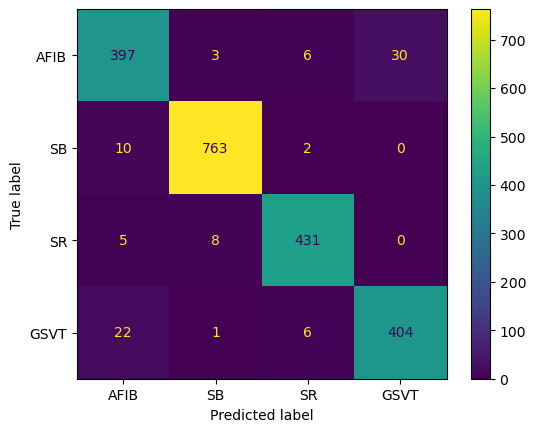

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.963602,0.910550,0.914747,0.912644,0.977603
1,SB,0.988506,0.984516,0.984516,0.984516,0.990861
2,SR,0.987069,0.970721,0.968539,0.969629,0.991484
3,GSVT,0.971743,0.933025,0.930876,0.931949,0.981873
4,macro avg,NaN,0.949684,0.949669,0.949703,NaN
5,micro avg,NaN,0.955460,0.955460,0.955460,NaN
6,weighted avg,NaN,0.955442,0.955426,0.955460,NaN


In [54]:
evaluation_test = evaluation_test(y_test,y_pred)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [55]:
df_evaluation_test.to_csv("../Result/Stacking_multipleClass_AB.csv")